## Final Project Submission

Please fill out:
* Student name: Thomas Brown
* Student pace: Full Time
* Scheduled project review date/time: tbd
* Instructor name: Abhineet Kulkarni
* Blog post URL: tbd


In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
%matplotlib inline

# Importing Data:

In [2]:
df = pd.read_csv('kc_house_data.csv')
display(df.head())
display(df.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

## Exploring Data:

### Columns:

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Here's a list of the columns in the dataframe:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [3]:
df.isna().sum()
# Right off the bat, we see that the following values will need to be cleaned:
# Waterfront
# View
# Year Renovated
# Let's deal with these before searching for other hidden junk data and outliers.

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Data Cleaning:

### Waterfront: (done)

In [4]:
display(df['waterfront'].unique())
nulls1 = df['waterfront'].isna().sum()
print (f"{nulls1} null values in 'Waterfront'")
# Let's replace NaNs with 0s.  No further cleaning needed, this makes it a perfect dummy variable. 
# Given there are over 2,000 null values, I think it's safe to say these are meant to be 0s (not waterfront).

array([nan,  0.,  1.])

2376 null values in 'Waterfront'


In [5]:
# Replacing the nulls with 0s. 
df['waterfront'].fillna(0, inplace = True)
# Verifying that it worked
df['waterfront'].unique()

array([0., 1.])

### View: (NOT done)

In [6]:
display(df['view'].unique())
nulls2 = df['view'].isna().sum()
print (f"{nulls2} null values in 'View'")
# Only 63 null values to deal with.  
# Null values here should likely just be replaced with 0 as well

array([ 0., nan,  3.,  4.,  2.,  1.])

63 null values in 'View'


### Year Renovated: (NOT done)

In [7]:
display(df['yr_renovated'].unique())
nulls3 = df['yr_renovated'].isna().sum()
print (f"{nulls3} null values in 'Year Renovated'")
# Here, we have 3,842 values to replace.
# Given we have a 0 value, I think it's safe to replace the nulls with 0s to represent houses 
# that have not been renovated.


array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

3842 null values in 'Year Renovated'


In [8]:
df.yr_renovated.value_counts()
# Vast majority of houses have not seen renovations.

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

__We have a couple things to do here:__
- We need to replace the null values with 0s.  I think it's safe to assume that nulls, have not been renovated.
    - If it were a more significant portion of the total houses listed (~22k) I would likely use a more <br>
    elegant solution such replacing nulls with year built + average time from build to remodel.
    - For now, though, I'm assuming these houses have not been remodeled.
- Second, I don't want to lose the year renovated, but I also need a dummy variable for is renovated or not. <br>
As such, I'll start with making a new column, "has_been_renovated" where 0 is "no renovation" and 1 is "has been renovated"

### SquareFeet Basement: (NOT done)

If you look closely, you'll see a value listed as '?' listed below.  We'll need to replace those with 0s!
We'll also want to convert this to an int value when complete.
<br>We'll want a dummy variable here as well.

In [9]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [28]:
'''CODE FOR MAKING IT AN INT VALUE'''
#df['sqft_basement'].astype(str).astype(int)

'CODE FOR MAKING IT AN INT VALUE'

### Grade: (NOT done)

In [10]:
df['grade'].unique()
# Strange, it appears to be a scale from 3 to 13.  By subracting 3 from all, we can normalize the scale.

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

### Date: (done)

Here, I simply changed the format so it can be read more easily later on.

In [11]:
df['date'] = pd.to_datetime(df['date'])

# Exploratory Data Analysis:

## Q1: 

Idea: Map of KC with heat over size of house relative to price. . .

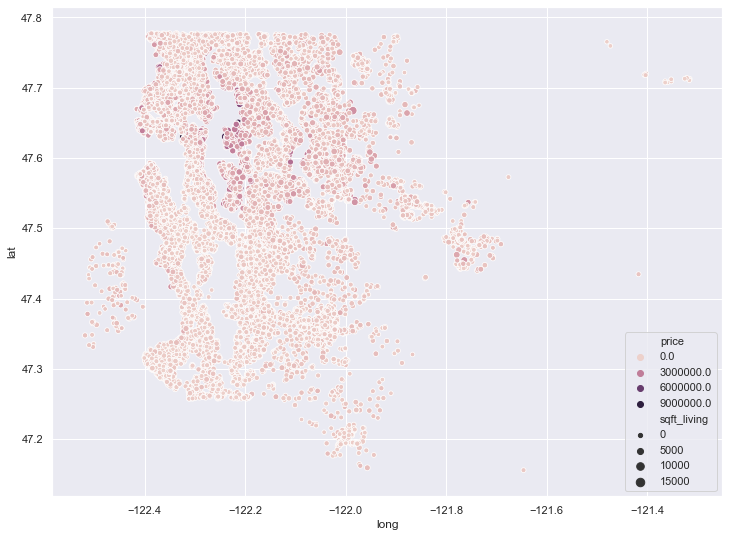

In [43]:
ax = sns.scatterplot(data = df, x = 'long',y = 'lat', hue = 'price', 
                     size = 'sqft_living')
sns.set(rc={'figure.figsize':(12,9)})
# Need to figure out the color min/max.  Also would be awesome to set this over an actual map.

## Q2:

Idea: 

## Q3:

Idea: 

# Feature Engineering:

## Categorical vs. Continuous:

In [ ]:
'''
EXAMPLE CODE FROM LESSON:
continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)

X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']
'''

### Categorical:

In [ ]:
df_cat = []

### Continuous:

In [ ]:
df_con = []

## Normality:

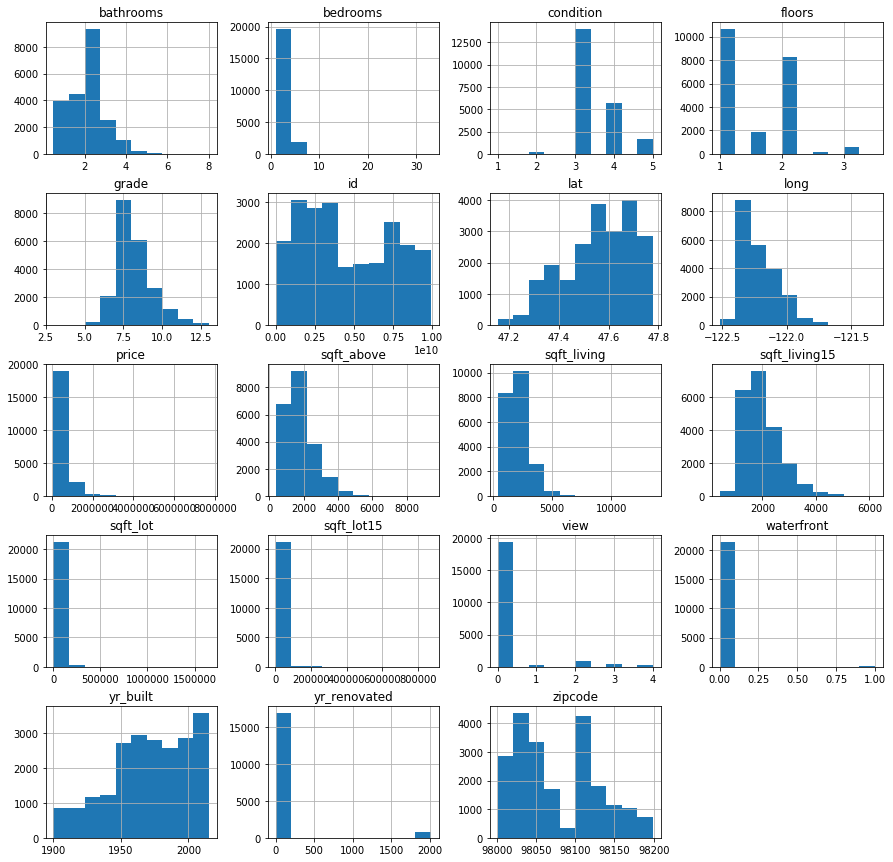

In [13]:
# Histogram to explore normality.  This is a basic eyeball test.
# Many of the values appear skewed or zero biased.
df.hist(figsize=(15,15));

### Log Transformations:

Log Transformations are a way of inducing normality from an otherwise not normally distributed set of data.

## Multicollinearity:

Multicollinearity is an issue that can lead to a broken regression result when two explanatory variables are too highly correlated for the model to tell which is the driving in terms of the result.

In [14]:
# Checking to see if any potential explanitory variables are highly correlated.
# Anything over .75 will be addressed/removed.
# This chart is a bit unwieldy, but we will look at a simpler version below. 
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


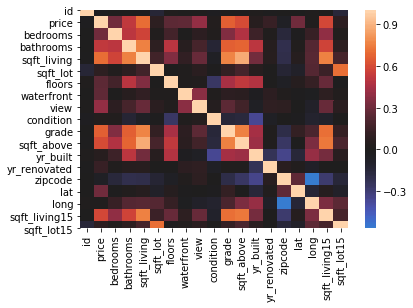

In [15]:
# Heatmap for quick visualization.
sns.heatmap(df.corr(), center=0);

The above chart is a bit messy.  We're just searching for values correlated more strongly than .75.  Let's simplify it by using a new color scheme, where the color only becomes brighter after a correlation stronger than .75.

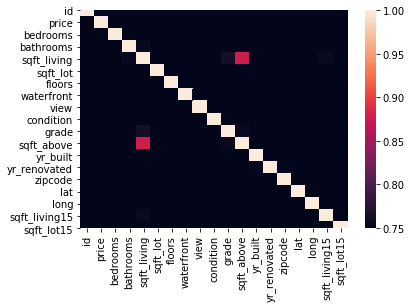

In [24]:
sns.heatmap(df.corr(), vmin=0.75);

Much better!  It looks like we'll just need to take care of sqft_living vs. sqft_above.  I think general living space is more important to focus on, so let's drop sqft_above from our future regression model.

# Train/Test Split:

In [ ]:
'''
EXAMPLE K FOLD CODE:

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

MAYBE TRY WITH K = 10 OR 20 AS WELL.  NEED TO KNOW WHICH IS BETTER AND WHY
'''

# Regression Models:

Importing Libraries:

In [48]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings('ignore')

## Simple Linear Model:

Here, we'll start with a relatively simple model to explore the data and see which variables are the most significant with a regression.

In [ ]:
# This model essentially uses everything.  Do not run yet.  Clean first.
predictors = df.drop('price', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df['price'],predictors_int).fit()
model.summary()

### Interpreting Results:

-

### Model Validity:

Heteroscedasticity, QQ Plots and more:

## Multiple Regression with Transformations:

### Interpreting Results:

-

### Model Validity:

Heteroscedasticity, QQ Plots and more:

## Refining Model:

In [2]:
# Stepwise functions or recursion


# Further Work To Do:

# Conclusion: